# Importar librerias

In [30]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

# Preparando datos de prueba

In [3]:
# y -> los puntos a que cluster pertenecen
# c -> La ubicación de los centroides en dos dimenciones (x,y)
# X -> Los puntos en dos dimensiones (x,y)

X, y, c  = make_blobs(500, cluster_std=0.8, centers=4,n_features=2, return_centers=True)

In [4]:
df_blobs = pd.DataFrame(
    {
        "x1":X[:,0],
        "x2":X[:,1],
        "y":y
    }
)

df_blobs

,x1,x2,y
0,-2.313507,5.930689,0
1,7.368352,-10.076674,1
2,6.577181,2.587351,3
3,8.966704,-0.931751,2
4,7.486403,1.773535,3
...,...,...,...
495,6.976096,-10.874968,1
496,9.690117,-0.425979,2
497,-0.085312,7.200525,0
498,8.689670,-9.590509,1


In [5]:
df_centers = pd.DataFrame(
    {
        "x1":c[:,0],
        "x2":c[:,1]
    }
)
df_centers

,x1,x2
0,-1.080409,6.555194
1,7.952681,-9.886297
2,9.886868,-0.799457
3,6.859881,1.236452


# Visualizar datos

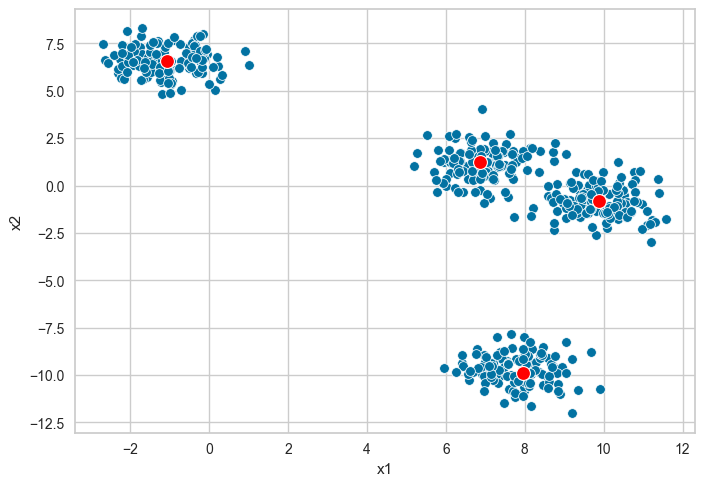

In [6]:
sns.scatterplot(data=df_blobs, x="x1", y="x2");
sns.scatterplot(data=df_centers, x="x1", y="x2", color="red", markers="X", s=100);



# Aplicando K-means

In [19]:
kmeans = KMeans(n_clusters=4) # Tomamos aleatoraimente 3 centroides (sabemos que son 4 porque en este ejemplo es claro y logico)

df_cluster = kmeans.fit_predict(X)
df_blobs["cluster"] = df_cluster
k_means_center = kmeans.cluster_centers_
df_k_means_center = pd.DataFrame(
    {
        "x1":k_means_center[:,0],
        "x2":k_means_center[:,1],

    }
)

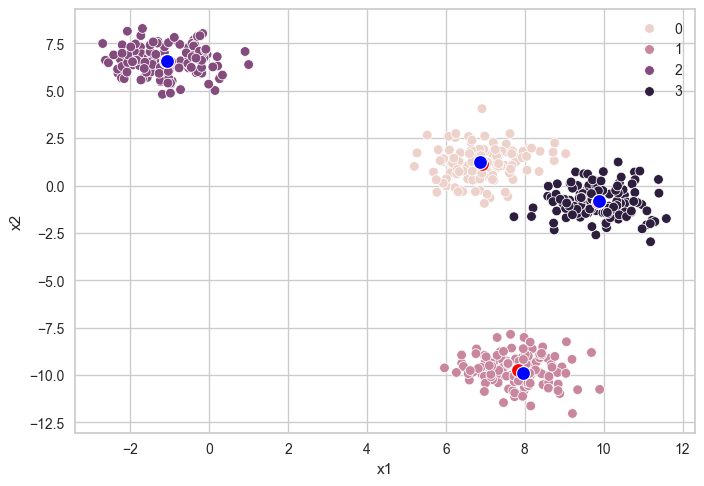

In [20]:
sns.scatterplot(data=df_blobs, x="x1", y="x2", hue="cluster");
sns.scatterplot(data=df_k_means_center, x="x1", y="x2", color="red", markers="X", s=100);
sns.scatterplot(data=df_centers, x="x1", y="x2", color="blue", markers="+", s=100);


In [25]:
def vis_clustering(k):
    kmeans = KMeans(n_clusters=k) # Tomamos aleatoraimente 3 centroides (sabemos que son 4 porque en este ejemplo es claro y logico)

    df_cluster = kmeans.fit_predict(X)
    df_blobs["cluster"] = df_cluster
    k_means_center = kmeans.cluster_centers_
    df_k_means_center = pd.DataFrame(
        {
            "x1":k_means_center[:,0],
            "x2":k_means_center[:,1],

        }
    )
    sns.scatterplot(data=df_blobs, x="x1", y="x2", hue="cluster")
    sns.scatterplot(data=df_k_means_center, x="x1", y="x2", color="red", markers="X", s=100)
    sns.scatterplot(data=df_centers, x="x1", y="x2", color="blue", markers="+", s=100)
    plt.show()

3


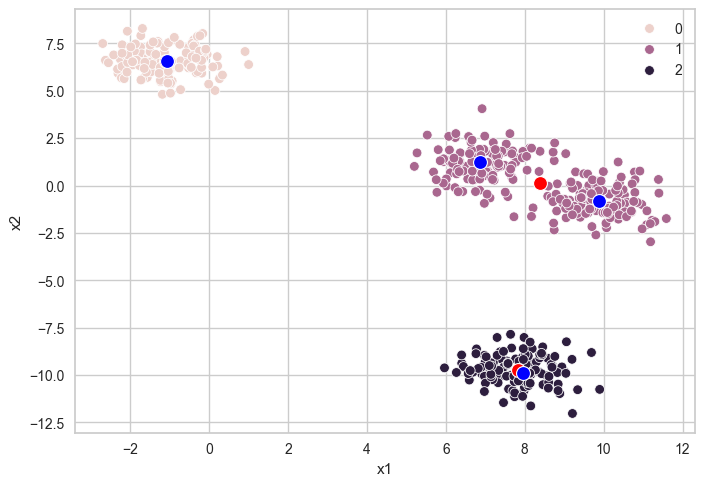

4


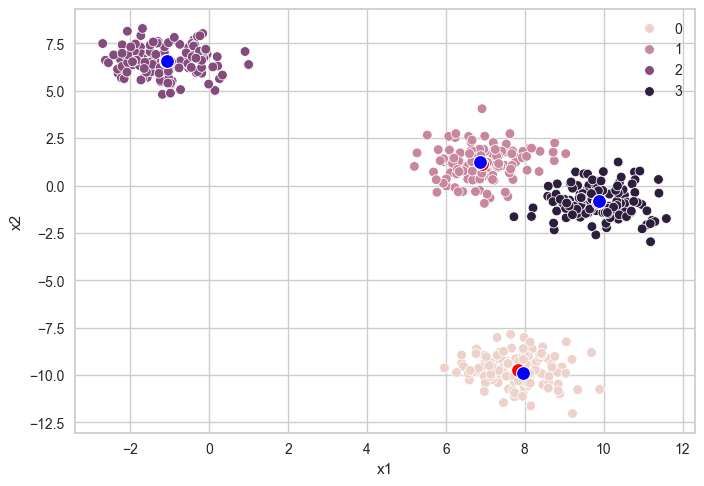

5


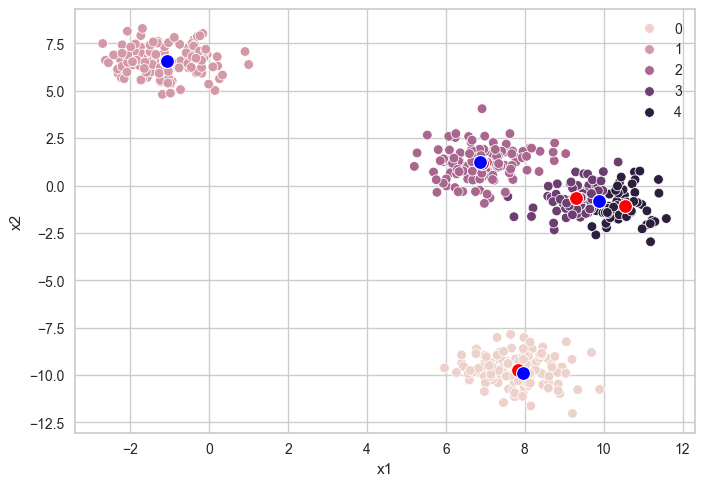

6


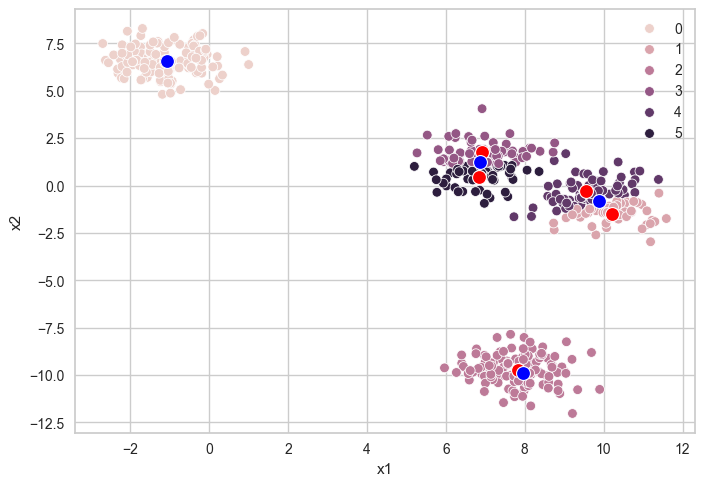

In [26]:
for _ in range(3,7):
    print(_)
    vis_clustering(_)

# Encontrando el valor de K

Text(0, 0.5, 'Inertia')

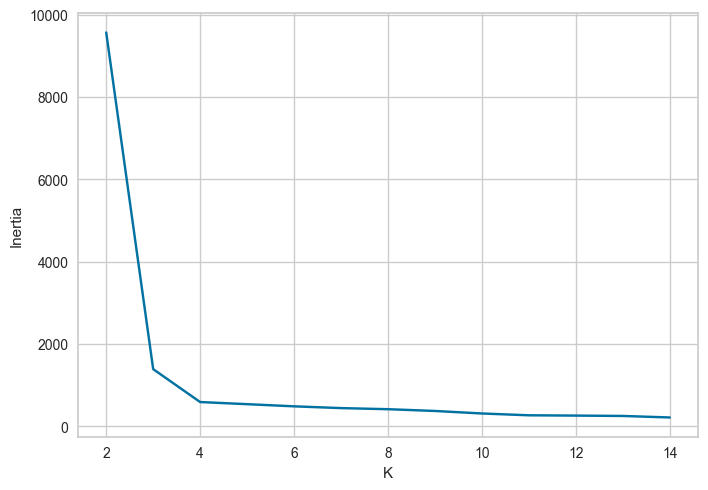

In [36]:
# Metodo del codo

sum_of_squared_distances = []

K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K,sum_of_squared_distances, "bx-")
plt.xlabel("K")
plt.ylabel("Inertia")

Text(0, 0.5, 'Score')

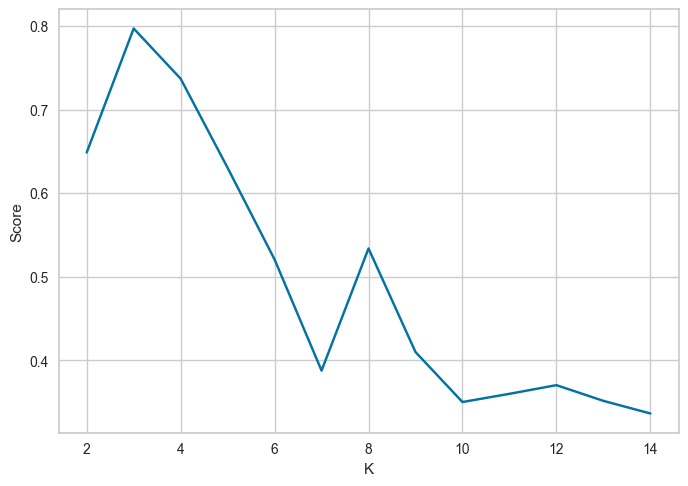

In [39]:
# Coeficiente de silueta

silhouette_scores = []

K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    y  = km.predict(X)
    silhouette_scores.append(silhouette_score(X,y))

plt.plot(K,silhouette_scores, "bx-")
plt.xlabel("K")
plt.ylabel("Score")

# los puntos mas altos tendran la mejor eficiencia (nímero de K)

# Evaluando clusteres con K-means

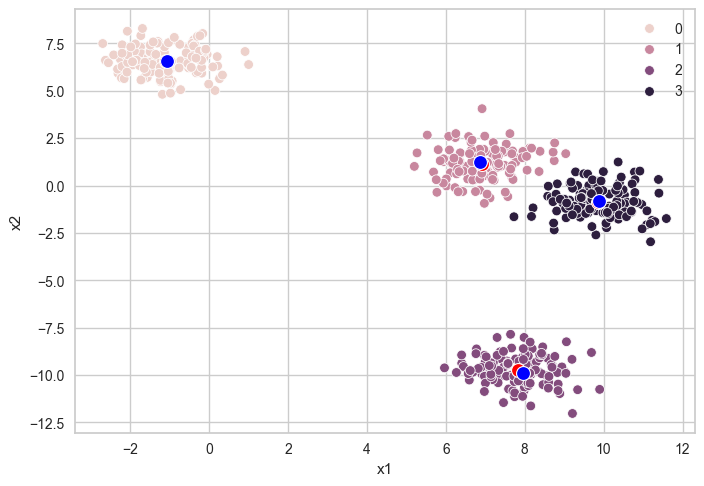

In [40]:
vis_clustering(4)

0.7370235102732723


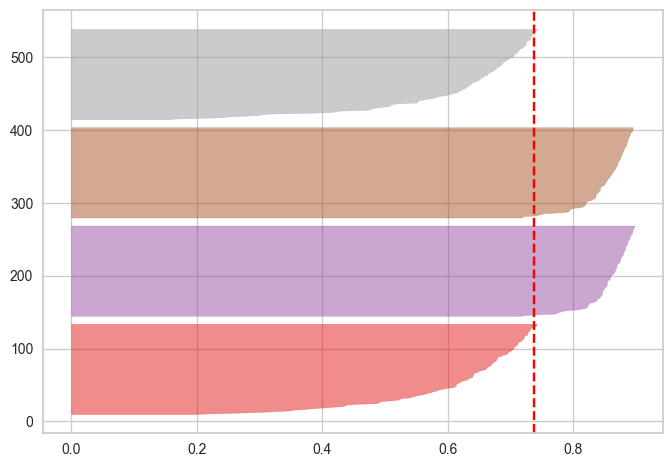

In [47]:


km = KMeans(n_clusters=4)
visualizer = SilhouetteVisualizer(km)
visualizer.fit(X)

yc4 = km.predict(X)



print(silhouette_score(X,yc4))